In [1]:
import pandas as pd
import numpy as np

%precision 3

'%.3f'

In [2]:
df_pub = pd.read_csv("../testsa/공립일반고.csv")
df_ind = pd.read_csv("../testsa/사립일반고.csv")

pub_keyword = np.array(df_pub['키워드 등장 수'])
ind_keyword = np.array(df_ind['키워드 등장 수'])

In [4]:
#사례수, 자유도 해놓은거
pub_n = len(pub_keyword)
ind_n = len(ind_keyword)

pub_df = pub_n - 1
ind_df = ind_n - 1
df = pub_df + ind_df

pub_df, ind_df

(24, 38)

In [5]:
#분산(불편파추정치)
pub_var = np.var(pub_keyword)
ind_var = np.var(ind_keyword)

pub_var , ind_var

(108.218, 144.041)

In [13]:
#통합분산
P_var = (pub_df*pub_var + ind_df*ind_var) / (pub_df + ind_df)
P_var

130.174

In [14]:
#표집분포의 표준오차
SE = np.sqrt(P_var*(1/pub_n + 1/ind_n))
SE

2.923

In [8]:
#이건 그냥 평균
pub_mean = np.mean(pub_keyword)
ind_mean = np.mean(ind_keyword)

pub_mean, ind_mean

(38.320, 32.103)

In [9]:
#두 독립집단 t값
t_value = (pub_mean - ind_mean) / SE
t_value

2.127

In [10]:
#두 독립집단 t검정 진행
#유의수준: 0.05
#영가설: 두 집단 간 키워드 등장 횟수 차이 x
#대립가설: 두 집단 간 키워드 등장 횟수 차이 o
from scipy.stats import t

alpha = 0.05

cri_value = t.ppf(1 - alpha/2, df)

print(f"자유도 {df}, 유의수준 {alpha}에서의 기각값: {cri_value:.4f}")
if (np.abs(t_value) > cri_value) :
    print("유의미한 차이 있음 (영가설 기각)")
else :
    print("유의미한 차이 없음 (영가설 기각 불가)")

자유도 62, 유의수준 0.05에서의 기각값: 1.9990
유의미한 차이 있음 (영가설 기각)


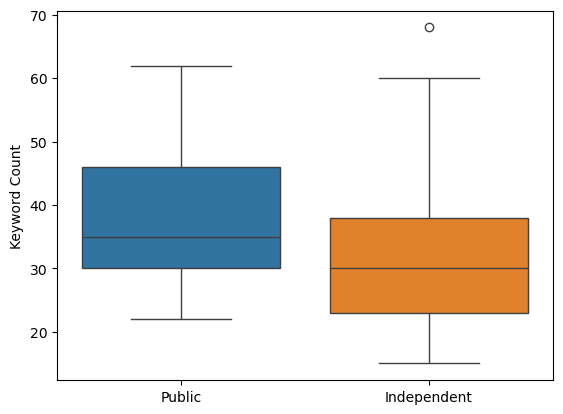

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

# 데이터 합쳐서 그리기
sns.boxplot(data=[pub_keyword, ind_keyword])
plt.xticks([0, 1], ['Public', 'Independent'])
plt.ylabel('Keyword Count')
plt.show()

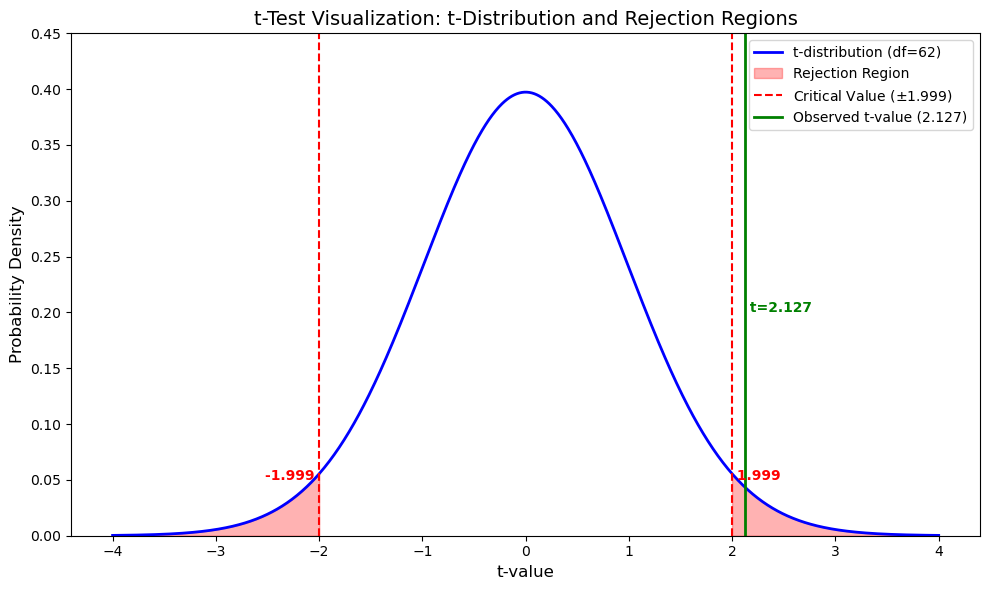

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t

# 1. 이전 단계에서 계산된 실제 수치 설정
df = 62            # 자유도 (Degree of Freedom)
t_value = 2.127    # 계산된 t-값 (Observed t-value)
alpha = 0.05       # 유의수준 (Significance Level)

# 2. 임계값(Critical Value) 계산
# 양측 검정이므로 alpha/2를 사용합니다.
cri_value = t.ppf(1 - alpha/2, df)

# 3. 그래프 데이터 생성 (t-분포 곡선)
x = np.linspace(-4, 4, 1000)
y = t.pdf(x, df)

# 4. 시각화 설정
plt.figure(figsize=(10, 6))
plt.plot(x, y, 'b-', lw=2, label=f't-distribution (df={df})')

# 5. 기각역(Rejection Region) 색칠 (빨간색 영역)
# 왼쪽 기각역
x_left = np.linspace(-4, -cri_value, 100)
plt.fill_between(x_left, t.pdf(x_left, df), color='red', alpha=0.3, label='Rejection Region')

# 오른쪽 기각역
x_right = np.linspace(cri_value, 4, 100)
plt.fill_between(x_right, t.pdf(x_right, df), color='red', alpha=0.3)

# 6. 임계값(Critical Value) 점선 표시
plt.axvline(-cri_value, color='red', linestyle='--', lw=1.5, label=f'Critical Value ($\pm${cri_value:.3f})')
plt.axvline(cri_value, color='red', linestyle='--', lw=1.5)

# 7. 관측된 t-값(Observed t-value) 실선 표시 (초록색)
plt.axvline(t_value, color='green', linestyle='-', lw=2, label=f'Observed t-value ({t_value:.3f})')

# 8. 수치 텍스트 추가
plt.text(cri_value, 0.05, f' {cri_value:.3f}', color='red', fontweight='bold')
plt.text(-cri_value, 0.05, f'-{cri_value:.3f} ', color='red', fontweight='bold', ha='right')
plt.text(t_value, 0.2, f' t={t_value:.3f}', color='green', fontweight='bold')

# 9. 라벨 및 타이틀 설정
plt.title('t-Test Visualization: t-Distribution and Rejection Regions', fontsize=14)
plt.xlabel('t-value', fontsize=12)
plt.ylabel('Probability Density', fontsize=12)
plt.legend(loc='upper right')
plt.ylim(0, 0.45)

# 10. 그래프 저장 및 출력
plt.tight_layout()
plt.savefig('t_test_visualization.png', dpi=300)
plt.show()